# FUN TUTORIAL
<img src="logo.png" style="position: absolute; top: 0; right: 0; width: 250px;"/>

---
<div style="background-color: none; padding: 15px; border-left: 5px solid #6c757d; border-radius: 4px; margin-bottom: 20px;">
    <p style="font-style: italic; margin-bottom: 5px;"><strong>Purpose:</strong> Learn geospatial analysis techniques with Python <br> in this interactive tutorial covering shapefile creation, visualization, and spatial operations.</p>
    <p style="font-style: italic;"><strong>Author:</strong> Aelita Totska | <span style="color: #6c757d;">aelita.totska@example.com</span></p>
</div>

- [Create a Shapefile](#-Create-a-Shapefile)
- [Visualise Geodata](#-Visualise-Geodata)
- [Export Results](#-export-results)

# Create a Shapefile

In [64]:
# --- IMPORTS ---
import sys
print("This Notebook was produced with the following versions:")
print(f"Python version: {sys.version}")

import geopandas as gpd
from shapely.geometry import box
from pathlib import Path
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from shapely.geometry import Point, LineString, Polygon
import pandas as pd

print(f"Geopandas version: {gpd.__version__}")
print(f"Shapely version: {gpd.__version__}")
print(f"Pandas version: {pd.__version__}")

This Notebook was produced with the following versions:
Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Geopandas version: 1.0.1
Shapely version: 1.0.1
Pandas version: 2.2.2


Create your own shp with custom input, e.g.

```bash
lat_min, lat_max = 49.00, 56.00
long_min, long_max =-12.00, 3.00

In [ ]:
# --- BOUNDING BOX CREATION ---
# Define your bounding box coordinates
lat_min = float(input("Enter the minimum latitude:"))
lat_max = float(input("Enter the maximum latitude:"))
long_min = float(input("Enter the minimum longitude:"))
long_max = float(input("Enter the maximum longitude:"))

# Create a rectangular polygon using shapely's box (minx, miny, maxx, maxy)
bounding_box = box(long_min, lat_min, long_max, lat_max)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    {'geometry': [bounding_box]},
    crs='EPSG:4326'  # WGS84
)

print("Bounding box created with the following coordinates:")
print(f"Latitude: {lat_min} to {lat_max}")
print(f"Longitude: {long_min} to {long_max}")

Bounding box created with the following coordinates:
Latitude: 49.0 to 56.0
Longitude: -12.0 to -3.0


or upload dara from a CSV file:

In [ ]:
# --- Load points from CSV ---
df = pd.read_csv("Coord_input_2.csv")  # Make sure this file has 'latitude' and 'longitude' columns

# --- Create geometry column ---
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf_points = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# --- Create Polygon (connect and close the loop) ---
polygon = Polygon(geometry)  # Use only if the first and last points form a boundary

# --- Create GeoDataFrame with single shape ---
gdf = gpd.GeoDataFrame({'geometry': [polygon]}, crs='EPSG:4326')

print("Shapefile created from CSV points!")

Shapefile created from CSV points!


# Visualise Geodata

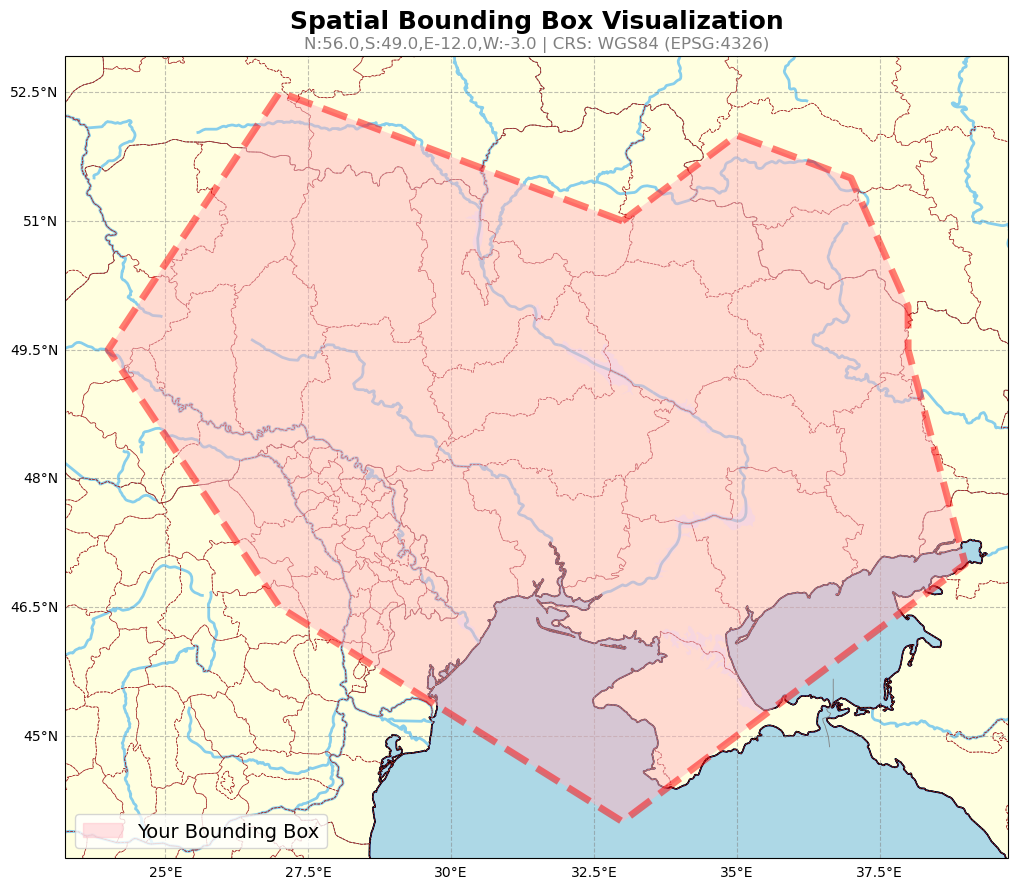

In [70]:
# Create Cartopy figure and axis
fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot filled bounding box
gdf.plot(ax=ax, facecolor='lightpink', edgecolor='red', linestyle='--', linewidth=5, alpha=0.5, transform=ccrs.PlateCarree(), zorder=5)

# Add Cartopy features with custom design
ax.coastlines(resolution='10m', linewidth=1.2)
ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightyellow', edgecolor='darkgreen')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', edgecolor='blue')
ax.add_feature(cfeature.LAKES, facecolor='aliceblue')
ax.add_feature(cfeature.RIVERS, edgecolor='skyblue', linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor='brown', linestyle='--', linewidth=0.5)


# Add title and subtitle with styling
ax.set_title("Spatial Bounding Box Visualization", fontsize=18, weight='bold', pad=20)
ax.text(0.5, 1.01, f"N:{lat_max},S:{lat_min},E{long_min},W:{long_max} | CRS: WGS84 (EPSG:4326)", 
        transform=ax.transAxes, ha='center', fontsize=12, color='gray')

# Add legend for bounding box
bbox_patch = mpatches.Patch(color='lightpink', alpha=0.4, label='Your Bounding Box')
ax.legend(handles=[bbox_patch], loc='lower left', fontsize=14, frameon=True, framealpha=0.8)

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5, color='gray')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.tight_layout()
plt.show()


# Export Results
[Go back and run again if not happy!](#fun-tutorial)

In [ ]:
output_dir = Path(r'D:\TESTS\OUT')
output_dir.mkdir(parents=True, exist_ok=True)

# Save to a shapefile
gdf.to_file(output_dir / "bounding_box.shp")
print(f"Bounding box saved to {output_dir / 'bounding_box.shp'}")

print("🌿🌎💛🩵THANK YOU FOR USING THIS SCRIPT!🩵💛🌎🌿")

Bounding box saved to D:\TESTS\OUT\bounding_box.shp
THANK YOU FOR USING THIS SCRIPT!


<div style="text-align: center; font-family: 'Comic Sans MS', 'Chalkboard SE', cursive; font-size: 24px; color: #ff69b4;">

  <p>
    <a href="https://talontribune.com/wp-content/uploads/2023/01/image_6487327-2-722x900.jpg" target="_blank" style="text-decoration: none; color: #ff69b4;">
      🎉 <strong>Grab your reward, champ!</strong> 🏆
    </a>
  </p>

</div>
